In [1]:
import os
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import pandas as pd

/home/mbelancon/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
d=0.00000346
th=-0.57
m=6.01
w0=0.000646
v=52.6
beta=0.0000173
nu=0.29
dndt=0
df=0.000022
of=0.899

In [3]:
a=float(subprocess.run([r'/home/mbelancon/tmhamtl-onoff', 'temp.dat', str(d), str(th), str(m), str(w0), str(v), str(beta), str(nu), str(dndt), str(df), str(of)],capture_output=True,text=True).stdout[0:-1])

In [3]:
m=22.1
w0=57e-6
v=2.07
l=1.85e-3
df=2.2e-5
cs=810
cf=1005
dens=2890
denf=1.18

particles=8

def f(difu0,theta0,eta0):
    return [difu0,theta0,eta0]*(1+percent/100*(np.random.rand(3)-0.5))

def lamchi (ds,ths,thf):
    return float(subprocess.check_output([r'/home/mbelancon/tllam', 'datatofit.dat', str(ds), str(ths), str(thf), str(m), str(w0), str(v), str(l), str(df), str(cs), str(cf), str(dens), str(denf)],universal_newlines=True).split()[0])

In [10]:
difu0=5e-7
theta0=7
eta0=55
chi=1
print('Initial Values')
difu0,theta0,eta0,chi

Initial Values


(5e-07, 7, 55, 1)

In [ ]:
k=0
percent=5
while k<5:
    points=[]
    for i in range(particles):
        points.append(f(difu0,theta0,eta0))
    data=np.column_stack((points,[lamchi(points[i][0],points[i][1],points[i][2]) for i in range(particles)]))
    bestfit=data[np.argmin(np.transpose(data)[3])]
    k+=1
    if(bestfit[3]<chi):
        difu0=bestfit[0]
        theta0=bestfit[1]
        eta0=bestfit[2]
        chi=bestfit[3]
        print("Better parameters found")
    print("Chi^2="+str(bestfit[3])+", "+str(particles*k)+" combinations evaluated")

finalfit=np.loadtxt('result-'+str(bestfit[0])+'-'+str(bestfit[1])+'-datatofit.dat')
tofit=np.loadtxt('datatofit.dat')    

plt.plot(tofit.T[0],tofit.T[1],'*')
plt.plot(finalfit.T[0],finalfit.T[1],'*')

os.system('rm result-*')

difu0,theta0,eta0,chi

Better parameters found
Chi^2=0.0048568611, 8 combinations evaluated
Better parameters found
Chi^2=0.0036464017, 16 combinations evaluated
Better parameters found
Chi^2=0.0029108197, 24 combinations evaluated


In [63]:
np.savetxt('48run.txt',finalfit)

In [95]:
plt.rcParams['figure.figsize'] = [15,15]

sns.set_style("white")
sns.set_style({"xtick.direction": "out",
                "ytick.direction": "out"})

rcparams = {'font.family': 'sans-serif',
           'font.sans-serif': ['Helvetica'],
           'axes.labelsize': 28,
           'axes.titlesize': 28,
           'legend.fontsize': 20,
           'ytick.right': 'off',
           'xtick.top': 'off',
           'ytick.left': 'on',
           'xtick.bottom': 'on',
           'xtick.labelsize': '25',
           'ytick.labelsize': '25',
           'axes.linewidth': 2.5,
           'xtick.major.width': 1.8,
           'xtick.minor.width': 1.8,
           'xtick.major.size': 14,
           'xtick.minor.size': 7,
           'xtick.major.pad': 10,
           'xtick.minor.pad': 10,
           'ytick.major.width': 1.8,
           'ytick.minor.width': 1.8,
           'ytick.major.size': 14,
           'ytick.minor.size': 7,
           'ytick.major.pad': 10,
           'ytick.minor.pad': 10,
           'axes.labelpad': 15,
           'axes.titlepad': 15,
           'axes.spines.right': False,
           'axes.spines.top': False
          }

mpl.rcParams.update(rcparams) 

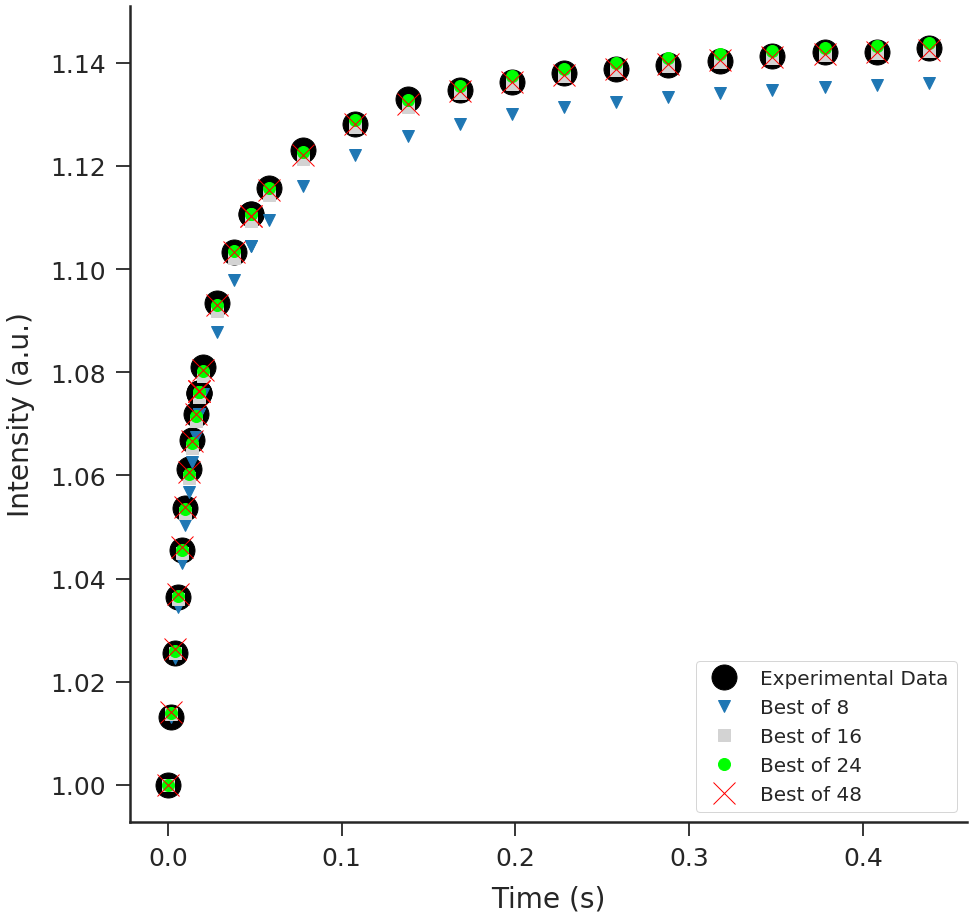

In [169]:
plt.plot(np.loadtxt('datatofit.dat').T[0],np.loadtxt('datatofit.dat').T[1],'o',markersize=25,color='black',label='Experimental Data')
plt.plot(np.loadtxt('8run.txt').T[0],np.loadtxt('8run.txt').T[1],'v',markersize=12,label='Best of 8')
plt.plot(np.loadtxt('16run.txt').T[0],np.loadtxt('16run.txt').T[1],'s',markersize=12,color='lightgray',label='Best of 16')
plt.plot(np.loadtxt('24run.txt').T[0],np.loadtxt('24run.txt').T[1],'o',markersize=12,color='lime',label='Best of 24')
#plt.plot(np.loadtxt('32run.txt').T[0],np.loadtxt('32run.txt').T[1],'*',markersize=12)
#plt.plot(np.loadtxt('40run.txt').T[0],np.loadtxt('40run.txt').T[1],'*',markersize=12)
plt.plot(np.loadtxt('48run.txt').T[0],np.loadtxt('48run.txt').T[1],'x',markersize=22,color='red',label='Best of 48')
plt.xlabel('Time (s)')
plt.ylabel('Intensity (a.u.)')
plt.legend()
plt.savefig('fitting.pdf',dpi=300)